In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("netflix1.csv")
df.shape

In [ ]:
cat_col = [d for d in df.columns if df[d].dtype == 'object']
num_col = [d for d in df.columns if df[d].dtype != 'object']

In [ ]:
num_col
cat_col

In [ ]:
import seaborn as sns
for col in num_col:
    plt.figure(figsize=(16,6))
    sns.boxplot(x=df[col])
    plt.show()


In [ ]:
for col in num_col:
    plt.figure(figsize=(16,6))
    sns.histplot(df[col], kde=True)
    plt.show()

In [ ]:
type_counts = df.type.value_counts()
type_counts
plt.figure(figsize=(10,4))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title("Types of conetent distribution")
plt.axis('equal')
plt.show()

In [ ]:
sns.countplot(data=df, x="type")
plt.title("Content distribution on Netflix")
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x = "country")
plt.title("Countries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
country_count = df.country.value_counts()
plt.pie(country_count, labels=country_count.index)
plt.xticks(rotation=90)
plt.show()

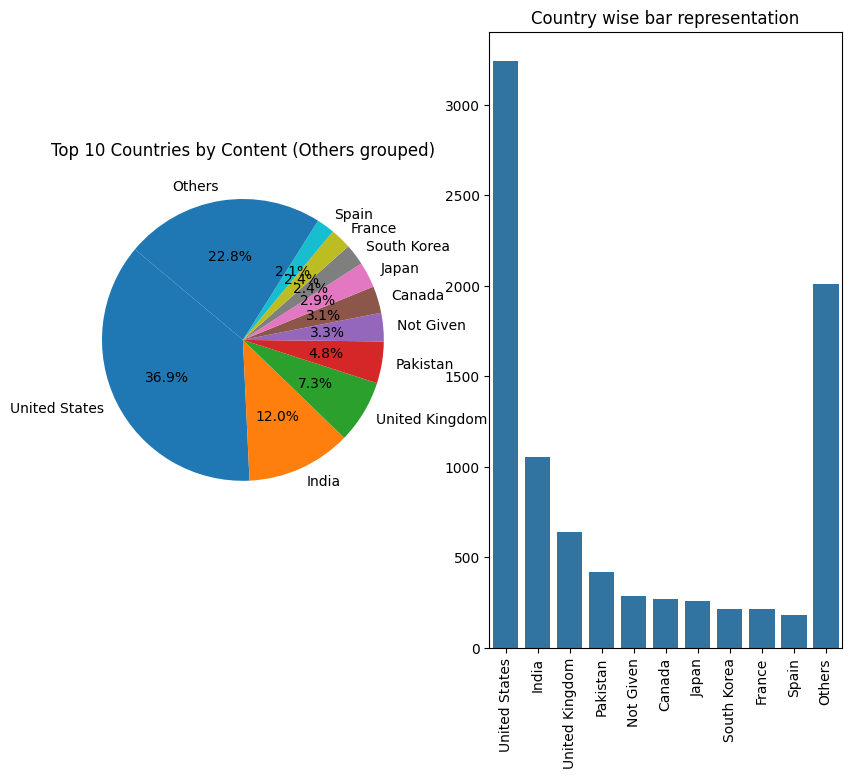

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

top_n = 10
country_count = df['country'].value_counts()

# Top 10 + Others
top_countries = country_count[:top_n]
others = country_count[top_n:].sum()
final_count = pd.concat([top_countries, pd.Series({'Others': others})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.pie(final_count, labels=final_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries by Content (Others grouped)')

plt.subplot(1,2,2)
sns.barplot(data=final_count)
plt.xticks(rotation=90)
plt.title("Country wise bar representation")

plt.show()

# final_count



C:\Users\cheta\AppData\Local\Temp\ipykernel_26728\2075434378.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


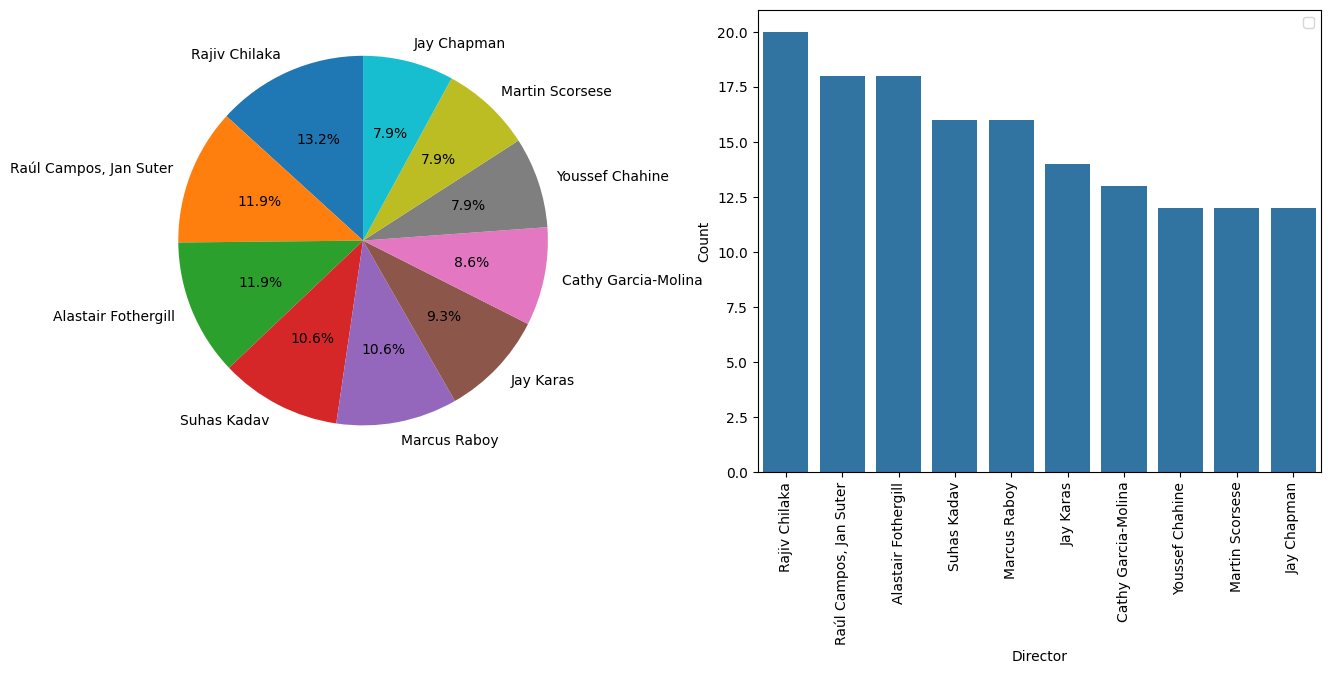

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Name: count, dtype: int64

In [127]:
df_filtered = df[df['director'].str.lower() != 'not given']
dir_count = df_filtered.director.value_counts()
top_dir = dir_count[:top_n]
# others = dir_count[top_n:].sum()
# final_dir = pd.concat([top_dir,pd.Series({"Others":others})])
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(top_dir,labels=top_dir.index, autopct="%1.1f%%", startangle=90)

plt.subplot(1,2,2)
sns.barplot(top_dir)
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("Count")
plt.legend()
plt.show()
top_dir

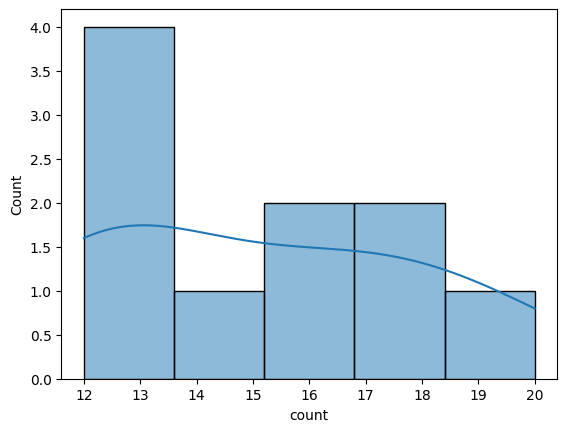

In [130]:
sns.histplot(top_dir, kde=True)
plt.show()

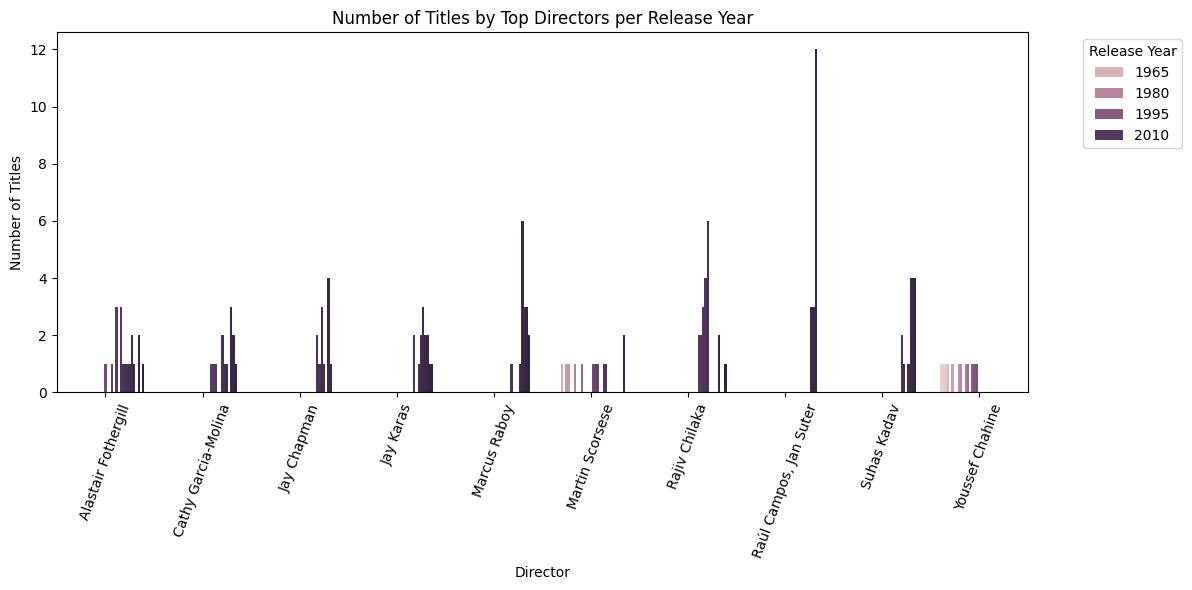

,director,release_year,count
0,Alastair Fothergill,2001,1
1,Alastair Fothergill,2006,1
2,Alastair Fothergill,2009,3
3,Alastair Fothergill,2011,3
4,Alastair Fothergill,2012,1
...,...,...,...
75,Youssef Chahine,1982,1
76,Youssef Chahine,1989,1
77,Youssef Chahine,1994,1
78,Youssef Chahine,1997,1


In [148]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = df[df['director'].str.lower() != "not given"]
top_directors = filtered_df['director'].value_counts().head(10).index
top_df = filtered_df[filtered_df['director'].isin(top_directors)]
grouped = top_df.groupby(['director', 'release_year']).size().reset_index(name='count')


plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='director', y='count', hue='release_year')
plt.xticks(rotation=70)
plt.title("Number of Titles by Top Directors per Release Year")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.legend(title="Release Year",  bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.show()
grouped
